# Checkpoint 2

**Due: Friday, 6 November, 2020 at 5:00pm GMT**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import math

from scipy import linalg
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import spsolve
from scipy.sparse import diags
from scipy.sparse import identity
from scipy.linalg import eigh_tridiagonal
from scipy.sparse import csr_matrix

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

# Task 1 (25p)

Find numerically the first 101 lowest eigenvalues (“energies”) of the discrete Hamiltonian matrix, H, for V=0 and x=0,...,L, with L=100, dx=1/8 and with reflecting boundary conditions:

$
\begin{align}
\psi_N \equiv \psi_{N-1},
\end{align}
$

$
\begin{align}
\psi_{-1} \equiv \psi_0,
\end{align}
$

Here the index -1 denotes the element to the left of the element zero, not the element N-1 as in Python. Note that indices $-1, N$ refer to elements of $\psi$ that are outside the matrix H.

Hint: The eigenvalues, $w_n$, should be

$
\large
\begin{align}
w_n = \frac{2\left(1 - \cos (\frac{n \pi}{N}) \right)}{dx^2}
\end{align}
$

for n=0, 1,..., 100. The corresponding (non-normalized) eigenvectors, $v_n$ are

$
\large
\begin{align}
v_n = \cos \left( \frac{n \pi x}{L} \right)
\end{align}
$

for x=0, dx,..., (N-1)dx.

In [7]:
### Values for task 1
L  = 100
dx = 1/8
N  = int(L/dx)
print(f"Matrix size: {N}.")

Matrix size: 800.


In the cell below, compute the 101 lowest eigenvalues given the values of V, L, and dx from above. The function, `task1` should return an array of the eigenvalues.

It may be useful to write a generalized function for creating the Hamiltonian given values of N, dx, and V.

In [8]:
big_bang = time.time()

In [9]:
def hamiltonian(N, dx, V):
    """
    Compute the discrete Hamiltonian matrix.
    
    Parameters
    ----------
    N : int
        Number of points in trajectory arrays
    dx: float
        Step between equally spaced points in space in the path of the quantum particle
    V: array
        Potential of at each x position in the particle's path
        
    Returns
    -------
    H: matrix
        The Hamiltonian matrix
        
    """
    
    #diagonals = [np.ones(N-1), -2 * np.ones(N) - V * dx**2, np.ones(N-1)]

    H = - dx**(-2) * diags([1, -2, 1], [-1, 0, 1], shape=[N, N]).toarray() + diags([V], [0], shape=(N,N)).toarray()
    
    #implement boundary conditions
    H[0,0] += H[0,1]
    H[-1,-1] += H[-1,-2]
    
    return H

In [10]:
def task1():
    """
    Compute the 101 lowest eigenvalues of the Hamiltonian matrix
        
    Returns
    -------
    smallest_evalues: array
    
    """
    
    hmatrix = hamiltonian(N, dx, 0)
    
    evalues, evectors = eigsh(hmatrix, k=101, sigma=None, which='SM')
    smallest_evalues = np.sort(evalues)

    return smallest_evalues

## Testing task 1

The cell below will run your function and compare it with the expected values.

Time to solution: 1.885359525680542 seconds.


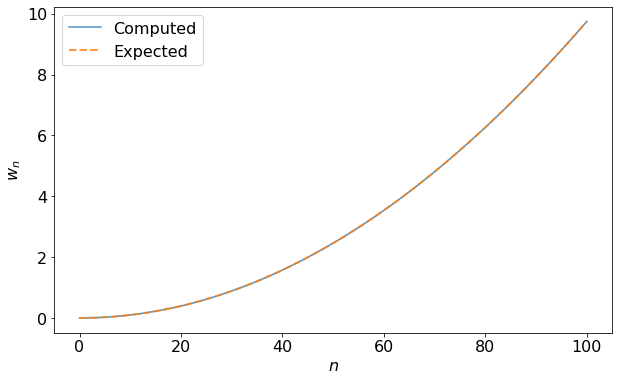

Max difference is 7.661133476638815e-12.


In [11]:
t1 = time.time()
ww = task1()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")

my_n = np.arange(101)
ww_expected = 2 * (1 - np.cos(my_n*np.pi/N)) / dx**2

plt.plot(my_n, ww, label='Computed', alpha=0.8)
plt.plot(my_n, ww_expected, label='Expected', linewidth=2, linestyle='--', alpha=0.8)
plt.xlabel(r'$n$')
plt.ylabel(r'$w_{n}$')
plt.legend()
plt.show()

diff = np.abs(ww - ww_expected) / np.max(np.abs([ww, ww_expected]), axis=0)
print (f"Max difference is {diff[1:].max()}.")
assert (diff[1:] < 1e-6).all()

# Task 2 (5p)

Select dx as a negative power of two ($dx=2^{-n}$ for n>0) such that the 101th eigenvalue differs from the dx$\rightarrow$0 limiting value of

$
\begin{align}
w_{101,exact} = \frac{(100\pi/N)^{2}}{dx^2}
\end{align}
$

by less than 0.1%, i.e., $|w_{101}/w_{101,exact}-1|<0.001$.

Motivation: selecting a sufficiently small dx is required to obtain a good approximation to the original (continuous) equation (1) for subsequent tasks.

In the cell below, compute a value of dx that satisfies the above contraint. The function `task2` should return the value of dx that you have calculated.

In [12]:
def task2():
    """
    Compute a value of dx that satisfies the above constraint
        
    Returns
    -------
    dx: float
        Calculated value of dx

    """
    n = np.arange(0,11, dtype=float)
    
    for i in range(0, n.size):
        my_dx = np.power(2.0, -i)
        nmax = max(102, int(L/my_dx))
        ww_exact = (100 * np.pi/nmax)**2 / my_dx**2
        
        hmatrix = hamiltonian(nmax, my_dx, 0)
        evalues = eigh_tridiagonal(np.diagonal(hmatrix), np.diagonal(hmatrix,1), eigvals_only=True, select='i', select_range=(0,100))
        error = abs((max(evalues)/ww_exact) - 1)
        
        if error < 0.001:
            return(my_dx)

## Testing task 2

The cell below will run the `task2` function. We will verify that value of dx return satisfies the criterion outlined above.

In [13]:
t1 = time.time()
my_dx = task2()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")


Time to solution: 0.3400077819824219 seconds.


In [14]:
print(my_dx)

0.03125


# Task 3 (20p)

Solve equation (1) with the initial condition (2) (the Schroedinger equation and the Gaussian function from the checkpoint's description) for V(x)=0, on a domain x=0...100, for t=0...4 and dx from task 2. Plot $|\psi(x,t)|^2$ and determine its mean given by

$
\large
\begin{align}
<x>\ = \int_{0}^{100} |ψ(x)|^2 x dx.
\end{align}
$

The mean should be equal to 79$\pm$-1.

Hint: use the procedure for creating the Hamiltonian matrix from tasks 1, 2. This will reduce the amount of coding required.

In [15]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

In [16]:
### Constants for task 3 and 4
x0     = 15
v      = 16
sigma2 = 5
tmax   = 4

In [17]:
def form_time(max_time, dx, dt):
    """
    Form an array for time
    
    Parameters
    ----------
    max_time: float
        End time in units of seconds.
    dx: float
        Step between equally spaced points in space in the path of the quantum particle
    dt: float
        Step between equally spaced points in time in while the particle moves
        
    Returns
    -------
    t_array: array
        Array of time values in seconds timing the particle's motion
        
    """
    t_array = np.arange(0, tmax + dt, dt)
    
    return t_array

In [18]:
def form_space(dx):
    """
    Form an array for space
    
    Parameters
    ----------
    dx: float
        Step between equally spaced points in space in the path of the quantum particle
        
    Returns
    -------
    x_values : array
        x positions of particle's path
    N: int
        Total number of steps taken by the particle through its path
        
    """
    
    N = int(L/dx)
    x_values = np.linspace(0, L, N)
    
    return N, x_values

In [19]:
def psi_initial(x, dx, velocity):
    """
    Compute the initial condition of the particle's wavefunction
    
    Parameters
    ----------
    x : array
        x positions of particle's path
    dx: float
        Step between equally spaced points in space in the path of the quantum particle
    velocity: float
        Initial velocity of the particle
        
    Returns
    -------
    psi0: array
        NORMALISED initial condition of the particle's wavefunction
        
    """
    
    gaussian = np.exp(-(x - x0)**2 / (sigma2))                        # create gaussian function
    
    # normalise the gaussian
    integral = integrate.simps(gaussian, x=None, dx=dx, even='last')
    norm_const = 1/np.sqrt(integral)
    
    #normalise initial condition 
    psi0 = norm_const * np.exp(-(x - x0)**2/ (2 * sigma2) + 1j * velocity * x/2)
    
    return psi0

In [32]:
def spectral(H, initial_condition, evalue_range, time):
    """
    Perform the spectral method to compute the wavefunction
    
    Parameters
    ----------
    x : array
        x positions of particle's path
    dx: float
        Step between equally spaced points in space in the path of the quantum particle
    velocity: float
        Initial velocity of the particle
        
    Returns
    -------
    psi0: array
        NORMALISED initial condition of the particle's wavefunction
        
    """
    #SPECTRAL METHOD
    
    lam, phi = eigh_tridiagonal(np.diagonal(H), np.diagonal(H,1), select='i', select_range=(evalue_range))
    a = np.ascontiguousarray(phi.T).dot(initial_condition)
    psi_n = 0
    
    ### BEGIN SOLUTION
    
    psi_n = (a * np.exp(-1j * lam * time) * phi).sum(axis=1)
    
    ### END SOLUTION
    
    return psi_n

In [33]:
# solves for psi using spectral method

def wavefunction(V):
    """
    Form an array for the wavefunction
    
    Parameters
    ----------
    V: float
        Potential of at each x position in the particle's path
        
    Returns
    -------
    x_values: array
        x positions of particle's path
    psi0: array
        Initial condition wavefunction of the partivle
    psi_n: array
        Wavefunction given a potential
        
    """
    # define variables
    N, x_values = form_space(2**(-5))
    new_dt = (my_dx)**2/2 
    hmatrix = hamiltonian(N, 2**(-5), V)
                                                                                                                                                                                                             
    # set initial condition
    psi0 = psi_initial(x_values, 2**(-5), v)
        
    psi_n = spectral(hmatrix, psi0, (150,350), tmax)
    
    # return only wanted values for t = 0 and t = 4 and x values
    return x_values, psi0, psi_n

## Task 3 plot and result

In the cell(s) below, do the following:
1. Solve equation (1) for t=0...4 and plot $|\psi(x,t=0)|^2$ and $|\psi(x,t=tmax)|^2$ as a function of x.
2. Compute the mean of the final position and print the value. The correct result should be between 78 and 80.

Don't forget to nomalize your Gaussian initial condition so that the total probability $\int_0^L |\psi(x,t=0)|^2 dx=1$. 

You do not have to wrap up the calculation in a function "task3()", but doing so may help to reduce the amount of coding for tasks 4-6.

In [34]:
from scipy.integrate import solve_ivp
from scipy import integrate

In [39]:
def prob_dens(V):
    """
    Compute the probability density and mean of the final position of the particle
    
    Parameters
    ----------
    V: float
        Potential of at each x position in the particle's path
        
    Returns
    -------
    x_values: array
        x positions of particle's path
    prob: array
        Probability density distribution of the initial position
    prob_n: array
        Probability density distribution of the final position
        
    """
    x_values, psi0, psi_n = wavefunction(V)
    
    # calculate wanted probability distributions
    prob0 = (psi0 * np.conjugate(psi0)).real
    prob_n = (psi_n * np.conjugate(psi_n)).real
    
    integrand =  prob_n * x_values
    mean = integrate.simps(integrand, x=None, dx=(2**-5), even='last')
    
    print('Mean = ' + str(mean))
    
    return x_values, prob0, prob_n

Mean = 78.37150592265881


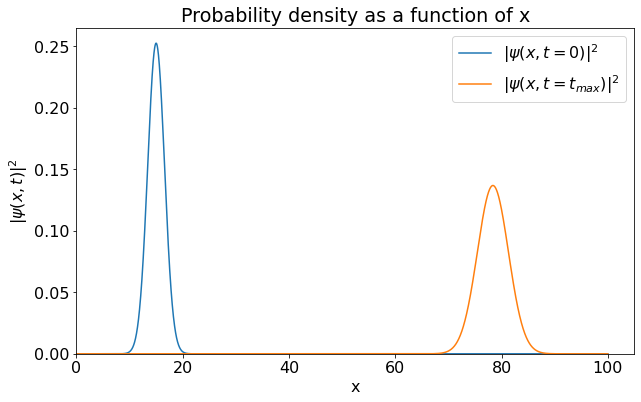

Time to solution: 0.8465845584869385 seconds.


In [40]:
def plot_distrib():
    """
    Plot the probability density the initial final positions of the particle
        
    """
    
    # plot probability distributions for t = 0 and t = 4
    
    x_values, prob0, prob_n = prob_dens(0)
    
    plt.plot(x_values, prob0, label='$|\psi(x,t = 0)|^2$')
    plt.plot(x_values, prob_n, label='$|\psi(x,t = t_{max})|^2$')
    plt.ylabel('$|\psi(x,t)|^2$')
    plt.xlabel('x')
    plt.title('Probability density as a function of x')
    plt.legend()
    plt.xlim(0)
    plt.ylim(0)
    plt.show()
    
t1 = time.time()
plot_distrib()
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")

# Task 4 (10p)

Now repeat task 3 for a potential made up of regularly spaced wells such that

V=70 for |x-i| < 0.25 where i=0,1,...,100,

and V=0 elsewhere.

Plot the potential. It should be $V=70$ for $x=0...0.25$, $V=0$ for $x=0.25...0.75$, $V=70$ for $x=0.75...1.25$, and so on.

Determine the mean of $|\psi(x,t)|^2$ as before, with accuracy $\pm$1.

Make sure that dx and dt are sufficiently small to achieve this accuracy!

In the cell below, create the potential and plot it over the range [0, 3].

In [41]:
def regular_V(x):
    """
    Create potential made up of regularly spaced wells
    
    Parameters
    ----------
    x_values: array
        x positions of particle's path
        
    Returns
    -------
    V: array
        Potential made up of regularly spaced wells
        
    """
    
    V = np.zeros(len(x))
    
    # condition for desired potential
    
    leftover = abs(x - np.fix(x))                    # |x - i|
    
    V = np.where((leftover > 0.25) & (leftover < 0.75), 0, 70)
    
    return V

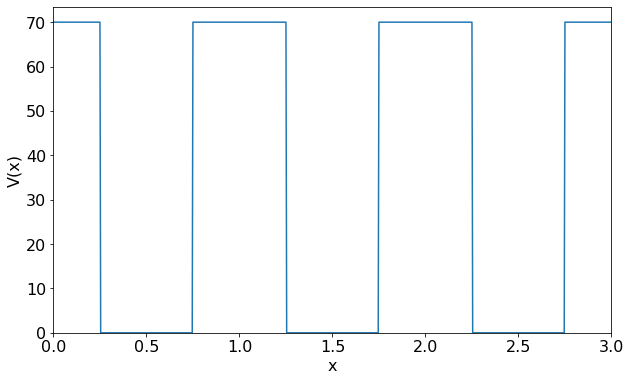

In [42]:
def plot_V():
    """
    Plot the evenly-spaced potential
        
    """
    
    x = np.arange(0, 3, 2**(-8))
    V = regular_V(x)

    # plot V against x
    plt.plot(x,V)
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.xlim([0,3])
    plt.ylim(0)
    plt.show()
    
plot_V()

# Task 4 continued

In the cell below, repeat task 3 with the new potential.

In [43]:
def task4(dx):
    """
    Create potential made up of regularly spaced wells
    
    Parameters
    ----------
    dx: float
        Step between equally spaced points in space in the path of the quantum particle
        
    Returns
    -------
    x_values: array
        x positions of particle's path
    psi0: array
        Initial condition wavefunction of the partivle
    psi_n: array
        Wavefunction given a potential
        
    """
    # define variables
    N4, x_values = form_space(dx)
    dt = dx**2/2
    V = regular_V(x_values)
    hmatrix = hamiltonian(N4, dx, V)
                                                                                                                                                                                                             
    # set initial condition
    psi0 =  psi_initial(x_values, dx, v)
    psi_n = psi0.copy()
        
    #perform the spectral method to obtain a solution
    psi_n = spectral(hmatrix, psi0, (0,550), tmax)
    

    # return only wanted values for t = 0 and t = 4 at all x values
    return x_values, psi0, psi_n

Mean = 57.149720228995584


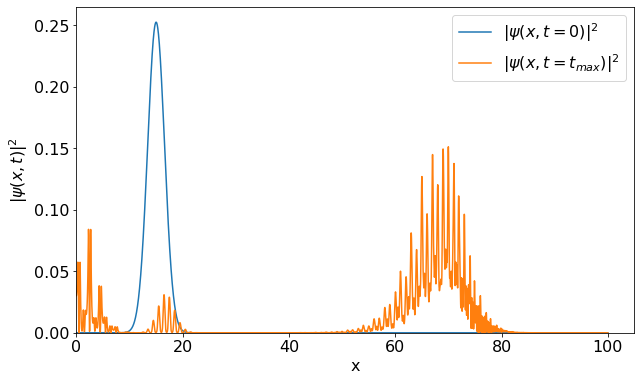

In [44]:
def prob_dens():   
    """
    Plot the probability density for the given potential
        
    """    
    x_values, psi0, psi_n = task4(2**(-5))
    
    # calculate wanted probability distributions
    prob0 = (psi0 * np.conjugate(psi0)).real.astype(float)
    prob_n = (psi_n * np.conjugate(psi_n)).real.astype(float)
    
    # use simpson's rule to integrate     
    integrand = prob_n * x_values
    mean = integrate.simps(integrand, x=None, dx=2**(-5), even='last')
    print('Mean = ' +str(mean))
    
    # plot probability distributions for t = 0 and t = 4
    plt.plot(x_values, prob0, label='$|\psi(x,t = 0)|^2$')
    plt.plot(x_values, prob_n, label='$|\psi(x,t = t_{max})|^2$')
    plt.ylabel('$|\psi(x,t)|^2$')
    plt.xlabel('x')
    plt.xlim(0)
    plt.ylim(0)
    plt.legend()
    plt.show()
    
prob_dens()

# Task 5 (15p)

Calculate the probability $P_{1/2}$ of the particle moving through the point x=L/2 by integrating the probability current 

$
\large
\begin{align}
j = (\psi^*  \frac{\partial \psi}{\partial x} -
\psi \frac{\partial \psi^*}{\partial x})(x=L/2)
\end{align}
$

over time, for t=0...4. The probability can deviate from the true value by no more than $\pm$0.01 (hint: the correct value is between 0.5 and 1).

In the cell below, calculate the probability and print your answer.

Naïve discretization: $x = jdx, t = n dt$

To find the partial derivative of $\psi$:

$
\large
\begin{align}
\frac{\partial \psi}{\partial x} \rightarrow \frac{\psi_{n,j+1} - \psi_{n,j}}{dx}
\end{align}
$

$
\large
\begin{align}
\frac{\partial \psi^*}{\partial x} \rightarrow \frac{\psi^*_{n,j+1} - \psi^*_{n,j}}{dx}
\end{align}
$

Then we must integrate using Simpson's rule

$
\large
\begin{align}
P_{1/2} = \int_{t = 0}^{t_{max}} j dt
\end{align}
$

In [142]:
pip install psyco

ERROR: Could not find a version that satisfies the requirement psyco (from versions: none)
ERROR: No matching distribution found for psyco
Note: you may need to restart the kernel to use updated packages.


In [138]:
def prob_half(dx5, evalue_range, velocity, potential):
    """
    Use the spectral method to find the wavefunction at all times and compute the probability current
    and integrate to calculate the probability of the particle moving through the point x=L/2 
    
    Parameters
    ----------
    dx5: float
        Step between equally spaced points in space in the path of the quantum particle
    evalue_range: array
        Range of eigenvalues to use in spectral method
    velocity: float
        Initial velocity of the particle
    potential: array
        Potential energy of the particle
        
    Returns
    -------
    P_half: float
        Probability of the particle moving through the point x=L/2 
        
    """
    
    #define parameters
    
    N5, x_values = form_space(dx5)
    dt5 = dx5
    t_array = np.ascontiguousarray(form_time(tmax, dt5, dx5))
    H = hamiltonian(N5, dx5, potential) 
    psi0 =  ((psi_initial(x_values, dx5, velocity)))   
    
    currents = np.zeros(t_array.size, dtype=complex)      #empty array for j's at different positions
    
       
    #BEGIN SPECTRAL METHOD
    
    lam, phi = eigh_tridiagonal(np.diagonal(H), np.diagonal(H,1), select='i', select_range=(evalue_range))
    a = np.ascontiguousarray(phi.T).dot(psi0)
    
    for n in range(t_array.size):
        
        psi_first = 0
        psi_next = 0 
                
        
        for i in range(lam.size):
            

            psi_first += a[i] * np.exp(-1j * lam[i] * t_array[n]) * phi[int(N5/2), i]
            psi_next += a[i] * np.exp(-1j * lam[i] * t_array[n]) * phi[int(N5/2) +1, i]
    
    #END OF SPECTRAL METHOD
        
        #calculate probability current at given time 
        
        delta = dx5**(-1) * (psi_next - psi_first)                #naive discretisation (as above)
        delta_conj = dx5**(-1) * (np.conjugate(psi_next) - np.conjugate(psi_first))
        psi_a_conj = np.conjugate(psi_first)
        j = -1j * (np.conjugate(psi_first) * delta - psi_first * delta_conj)
        
        currents[n] = j
    
    P_half = (integrate.simps(currents, dx=dt5)).real             #integrate over time to find probability

    return P_half

In [139]:
t1 = time.time()
x5 = form_space(2**(-5))[-1]
V5 = regular_V(x5)
print(prob_half(2**(-5),(200,500), v, V5))
t2 = time.time()
print (f"Time to solution: {t2-t1} seconds.")

0.8250041477581509
Time to solution: 0.9813263416290283 seconds.


# Task 6 (15p)

Plot the probability $P_{1/2}$ as a function of particle energy E=0...100, for at least 100 equally-spaced values from this range. All $P_{1/2}$ values should be within $\pm$0.01 of the true values. Use the formula 

$
\large
\begin{align}
E = \frac{1}{4} v^2
\end{align}
$

to convert between energy and velocity (valid for Eqs. (1,2)).

Bonus question: can you explain why the plot looks like this?

Plot the probability in the cell below.

**At particle energies less than 40, transmission amplitude is low as there is a very small probability of the particle being transmitted through half of the potential barriers. In this case the wavefunction decays but still penetrates the barriers (quantum tunnelling) so the probability is never zero. We can see that at energies 0 < E < 40, the probability decreases - as the energy moves away form zero, the component of the wave reflected from the barriers is larger, so the probability of it being transmitted further decreases. At E > 40, the probability of tunnelling increases as the energy of the particle is larger than half of the potential. Finally when E > V (i.e., when the energy of the particle is higher than that of the potential wells), the transmission amplitude of the particle reaches unity, showing oscillatory behaviour as the wavefunction .**


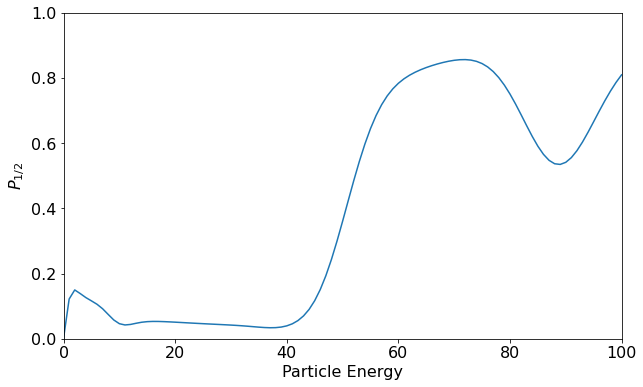

Time to solution: 1 minutes and 42.48116612434387 seconds.


In [83]:
t1 = time.time()

def plot_energyprobs():
    """
    Plot the probability at x=L/2 against energy of the particle for a range of energies
        
    """   
    dx6 = 2**(-5)
    N6, x6 = form_space(dx6)
    
    E = np.arange(0,101))                 # empty array for energy values
    probs = np.zeros(E.size)              # empty array for probability values 
    
    
    for i in range(E.size):               # loop to convert between energy and velocity and find probability
        velocity = np.sqrt(2**2 * E[i])
        probs[i] = prob_half(dx6, (200,500), velocity, regular_V(x6))
    
    plt.plot(E, probs)
    plt.xlabel('Particle Energy')
    plt.ylabel('$P_{1/2}$')
    plt.xlim([0,L])
    plt.ylim([0,1])
    plt.show()
    
plot_energyprobs()

t2 = time.time()
minutes = math.floor((t2-t1)/60)
print (f"Time to solution: {int(math.floor(minutes))} minutes and {t2 - t1 - minutes*60} seconds.")

# Task 7 (10p)

Assume again the initial condition of equation (2) with v=16, and consider a disordered potential in which

V=70 for |x-i| < b$_i$ where i=0,1,...,100,

and b$_i$ is a random variable uniformly distributed on [0.125, 0.375].

Find the probability $P_{1/2}$ by averaging over 100 realizations of the random potential (must be accurate to $\pm$0.02). Plot the histogram of $P_{1/2}$. Comment on the value of $P_{1/2}$ compared with task 5.

In [36]:
def disordered_V(x_array):
    """
    Create potential made up of randomly spaced wells
    
    Parameters
    ----------
    x_values: array
        x positions of particle's path
        
    Returns
    -------
    V: array
        Potential made up of randomly spaced wells
        
    """

    b = np.random.uniform(0.125, 0.375, x_array.size)           # random variable uniformly distributed
    b_n = np.zeros(x_array.size)
    
    V = np.zeros(len(x_array))
    
    # condition for desired potential
    
    leftover = abs(x_array - np.fix(x_array))                   # |x - i|
    b_n = np.array(b[x_array.astype(int)])
    
    V = np.where((leftover > b_n) & (leftover < 1 - b_n), 0, 70)
    
    return V

In [37]:
def task7():
    """
    Plot a histogram of the probability at x=L/2 in the randomly spaced potential
        
    """   
    # define variables
    dx7 = 2**(-5)
    N7, x7 = form_space(dx7)
    realizations = 100
    
    probs = np.zeros(realizations)       # empty list of probabilities at x = L/2 for each realization
    
    for i in range(realizations):        # loop to average probabilities over realizations of the potentials

        V7 = disordered_V(x7)
        probs[i] = prob_half(dx7, (200,500), 16, V7)          # compute probability at x = L/2
    
    avg_prob = np.average(probs)                              # take average of the array
    
    print(avg_prob)
    
    #plot histogram
    hist, bins, p = plt.hist(probs, bins=50, density=True)
    plt.xlim(0)
    plt.xlabel('$P_{1/2}$')
    plt.ylabel('Realizations')
    plt.show()

0.05487770438455202


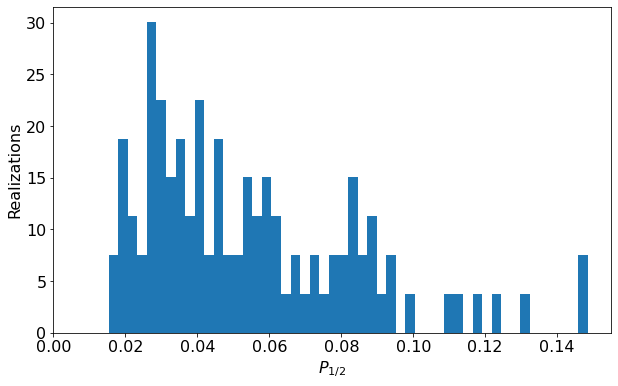

Time to solution: 2 minutes and 4.045889854431152 seconds.


In [38]:
t1 = time.time()
task7()
t2 = time.time()
minutes = math.floor((t2-t1)/60)
print (f"Time to solution: {minutes} minutes and {t2 - t1 - minutes*60} seconds.")

In [32]:
big_crunch = time.time()
minutes = math.floor((big_crunch-big_bang)/60)

print (f'Time to run notebook: {int(minutes)} minutes and {big_crunch - big_bang - minutes*60} seconds.')

Time to run notebook: 4 minutes and 14.218852043151855 seconds.
